<a href="https://colab.research.google.com/github/drsennet/Graphs-GNN/blob/main/GNN_cora_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -c "import torch; print(torch.version.cuda)"

In [ ]:
!python -c "import torch; print(torch.__version__)"

2.3.0+cu121


In [ ]:
!pip install torch-geometric
!pip install torch-sparse
!pip install torch-scatter

  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1092566 sha256=dafbb389ad8aae579950615f13cbea2f54328b149d51b30facf9015cb434c506
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507268 sha256=f97e561786e184c26c7e8e74b32811f9597b2585cfee2adbe9981e97425aacee
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter


In [ ]:
import torch
from torch_geometric.data import Data

# Dataset: Common Benchmark Data sets

In [ ]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!


In [ ]:
len(dataset)

600

In [ ]:
dataset.num_classes

6

In [ ]:
dataset.num_node_features

3

In [ ]:
dataset

ENZYMES(600)

In [ ]:
data = dataset[0]  # Get the first graph object.

#Name dataset:└─ ENZYMES
1. graphs: 600
2. nodes: ~32.6
3. edges: ~124.3
4. features: 3
6. classes/#tasks: 6

In [ ]:
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])



1. data.x: Node feature Matrix with shape [num_node, num_node_features]
2. data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
3. data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
4. data.y: Target to train against (may have arbitrary shape), eg., node-level targets of shapes[num_nodes, *] or graph-level targets of shape[1,'*']
5. data.pos: Node position matrix with shape [num_nodes, num_dimentsions]










#Convert data to Networkx

In [ ]:
from torch_geometric.utils import to_networkx

In [ ]:
type(data)

torch_geometric.data.data.Data

In [ ]:
networkx_graph = to_networkx(data)

In [ ]:
type(networkx_graph)

networkx.classes.digraph.DiGraph

In [ ]:
import networkx as nx

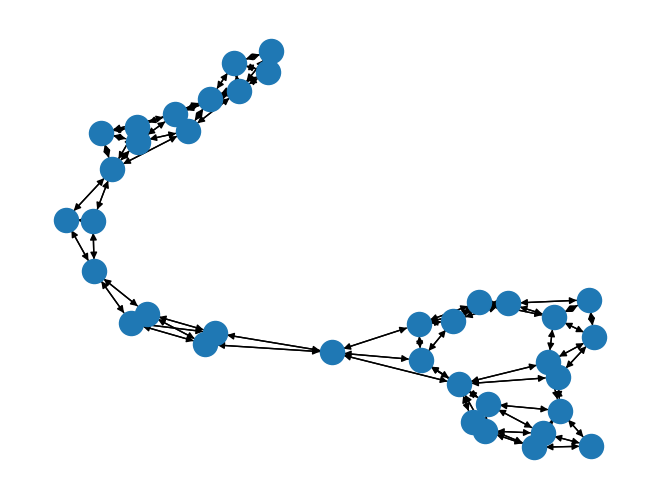

In [ ]:
nx.draw(networkx_graph)

#Cora dataset └─ Cora
1. graphs: 1
2. nodes: 2,708
3. edges: 10,556
4. features: 1,433
5. classes/#tasks: 7












In [ ]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!


In [ ]:
cora_dataset

Cora()

In [ ]:
cora_dataset.len()

1

In [ ]:
# number of graph
print("Number of grphs: ", len(cora_dataset))

# number of features
print("Number of features: ", cora_dataset.num_node_features)

# number of classes
print("Number of classes: ", cora_dataset.num_classes)


Number of grphs:  1
Number of features:  1433
Number of classes:  7


## # Get the first graph object: Cora

In [ ]:
c_ds = cora_dataset[0]

In [ ]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
# Number of nodes
print("Number of nodes: ", c_ds.num_nodes)

## Number of edges
print("Number of edges: ", c_ds.num_edges)

# Check if grph is directed
print("Is grapph directed: ", c_ds.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is grapph directed:  False


In [ ]:
c_ds.x[:0].shape

torch.Size([0, 1433])

In [ ]:
c_ds.x[:1].shape

torch.Size([1, 1433])

In [ ]:
c_ds.x[0].shape

torch.Size([1433])

In [ ]:
c_ds.x.shape

torch.Size([2708, 1433])

In [ ]:
# Sample nodes from the graph
print("Shape of sample nodes: ", c_ds.x[:5])

# Sample nodes from the graph
print("Shape of sample nodes: ", c_ds.x[:5].shape)

Shape of sample nodes:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Shape of sample nodes:  torch.Size([5, 1433])


In [ ]:
# number of graphs
c_ds_5 = c_ds.x[:5]
print("Number of graphs: ", len(c_ds_5))

# number of features
print("Number of features: ", c_ds_5.shape)

Number of graphs:  5
Number of features:  torch.Size([5, 1433])


In [ ]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
# Check training noes
print("# of node to train on: ", c_ds.train_mask.sum().item())

# Check validation nodes
print("# of node to validate on: ", c_ds.val_mask.sum().item())

# Check testing nodes
print("# of node to test on: ", c_ds.test_mask.sum().item())

# of node to train on:  140
# of node to validate on:  500
# of node to test on:  1000


In [ ]:
type(c_ds)

torch_geometric.data.data.Data

In [ ]:
networkx_graph = to_networkx(c_ds)

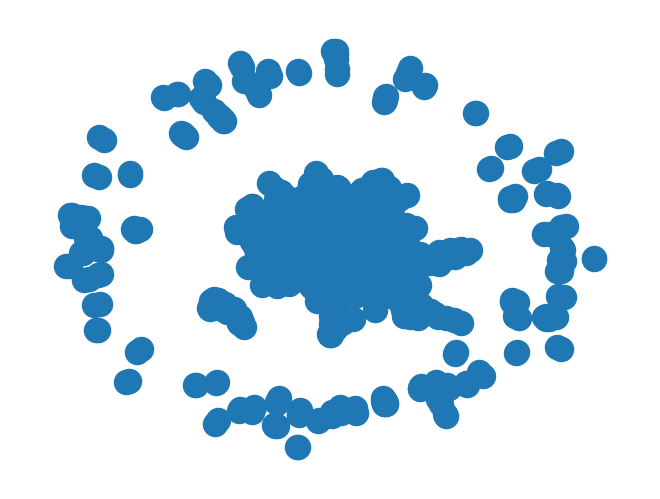

In [ ]:
nx.draw(networkx_graph)

In [ ]:
networkx_graph

In [ ]:
print(nx.is_weighted(networkx_graph))
print(networkx_graph.is_directed())
print(networkx_graph.order())
print(networkx_graph.number_of_edges())
print(networkx_graph.number_of_nodes())
print(networkx_graph.nodes)
print(networkx_graph.edges)

False
True
2708
10556
2708
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [ ]:
c_ds.x.shape

torch.Size([2708, 1433])

In [ ]:
# select a nodec_ds.x[2707].shape


In [ ]:
c_ds_10= c_ds.x[:10]

In [ ]:
c_ds_10.shape

torch.Size([10, 1433])

In [ ]:
type(c_ds_10)

torch.Tensor

In [ ]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
nx.write_gexf(networkx_graph, 'cora.gexf')

In [ ]:
nx.write_graphml(networkx_graph, 'cora.graphml')

# Cora Dataset from Networkx


1.   download cora.tgz link: https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
2.   upload cora.tgz to colab



In [ ]:
!tar -xvf /content/cora.tgz

cora/
cora/README
cora/cora.cites
cora/cora.content


In [ ]:
import os
import networkx as nx
import numpy as np
import pandas as pd
data_dir = os.path.expanduser('/content/cora')

In [ ]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"

In [ ]:
edgelist.sample(frac=1).head(5)

,target,source,label
2292,20601,12158,cites
1208,6209,118259,cites
3019,39130,521252,cites
2869,35490,1104031,cites
2366,22563,3220,cites


In [ ]:
Gnx = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(Gnx, "paper", "label")
#Gnx = nx.from_pandas_edgelist(edgelist, source='source', target='target', edge_attr=True, create_using=nx.Graph())

In [ ]:
print(nx.is_weighted(Gnx))
print(Gnx.is_directed())
print(Gnx.order())
print(Gnx.number_of_edges())
print(Gnx.number_of_nodes())
print(Gnx.nodes)
print(Gnx.edges)

False
False
2708
5278
2708
[1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 57

In [ ]:
Gnx

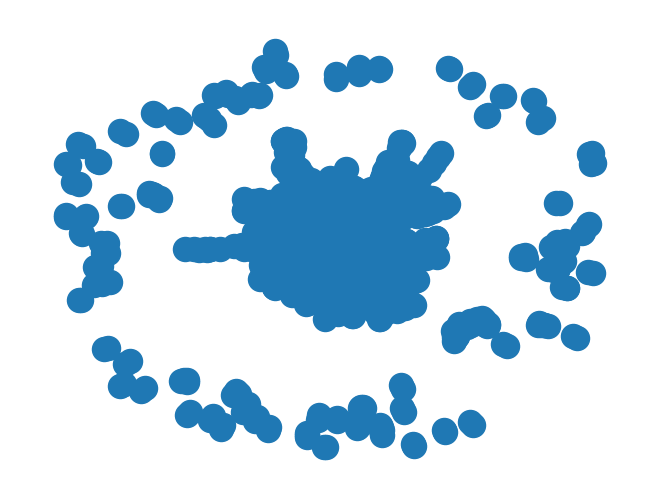

In [ ]:
nx.draw(Gnx)

In [ ]:
Gnx.number_of_nodes()

2708

In [ ]:
Gnx.nodes

NodeView((1033, 35, 103482, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1120431, 1123756, 1125386, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128959, 1128985, 1129018, 1129027, 1129573, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 12576, 128540, 132806, 135130, 141342, 141347, 148170, 15670, 1688, 175291, 178727, 18582, 190697, 190706, 1956, 197054, 198443, 198653, 206371, 210871, 229635, 231249, 248425, 249421, 254923, 259701, 259702, 263279, 263498, 265203, 273152, 27510, 28290, 286500, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 46431, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 56119, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 575077, 5752

In [ ]:
# get the node ID from the above list
Gnx.nodes[1136110]

{'label': 'paper'}

In [ ]:
feature_names = ["w_{}".format(ii) for ii in range(1433)]
column_names = feature_names + ["subject"]
node_data = pd.read_csv(os.path.join(data_dir, "cora.content"), sep='\t', header=None, names=column_names)
node_data.head()

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [ ]:
set(node_data["subject"])

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
data = cora_dataset[0]
print(f'Dataset: {cora_dataset}:')
print('======================')
print(f'Number of graphs: {len(cora_dataset)}')
print(f'Number of features: {cora_dataset.num_features}')
print(f'Number of classes: {cora_dataset.num_classes}')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


A

In [ ]:
A = nx.adjacency_matrix(Gnx)
A.todense()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

# own graph from Scratch

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
print(torch.__version__)

2.3.0+cu121


In [ ]:
edge_index = torch.tensor([[0, 1, 1, 2],
              [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

In [ ]:
edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [ ]:
x

tensor([[-1.],
        [ 0.],
        [ 1.]])

In [ ]:
data = Data(x=x, edge_index=edge_index)

In [ ]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [ ]:
from torch_geometric.utils import to_networkx

In [ ]:
G=to_networkx(data)

In [ ]:
type(G)

networkx.classes.digraph.DiGraph

In [ ]:
import networkx as nx

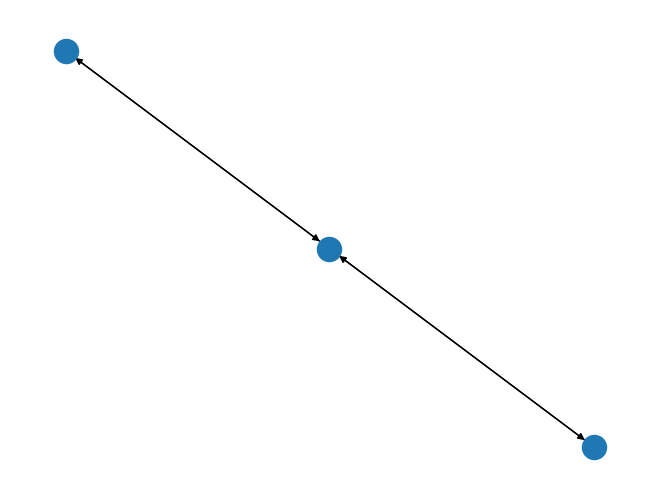

In [ ]:
nx.draw(G)

In [ ]:
data.keys

<bound method BaseData.keys of Data(x=[3, 1], edge_index=[2, 4])>

In [ ]:
for key, item in data:
    print(f'{key}, found in data')

x, found in data
edge_index, found in data


In [ ]:
'edge_attr' in data

False

In [ ]:
data.num_nodes

3

In [ ]:
data.num_edges

4

In [ ]:
data.num_node_features

1

In [ ]:
data.is_directed()

False

In [ ]:
data.has_isolated_nodes

<bound method BaseData.has_isolated_nodes of Data(x=[3, 1], edge_index=[2, 4])>

### Another Self drawn Graph

In [ ]:
edge_index = torch.tensor([[1, 2, 3, 4],
                           [5, 6, 7, 8]], dtype=torch.long)
#x = torch.tensor([[1], [1], [1]], dtype=torch.float)
x = torch.tensor([[1], [1], [1], [3], [3], [3] ], dtype=torch.float)

In [ ]:
print("Edge_index :", edge_index)
print("Attribute matrix: ", x)
print(edge_index.ndim)
print(edge_index.max())
print(x.ndim)

Edge_index : tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Attribute matrix:  tensor([[1.],
        [1.],
        [1.],
        [3.],
        [3.],
        [3.]])
2
tensor(8)
2


In [ ]:
# Create graph object
data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[6, 1], edge_index=[2, 4])


In [ ]:
# check number of edges, nodes, is_direted, num_node_feature, has_isolaed_nodes, edge_attr
print(data.num_nodes)
print(data.num_edges)
print(data.is_directed())
print(data.num_node_features)
print(data.has_isolated_nodes())
print(data.has_self_loops())

6
4
True
1
False
False


In [ ]:
# Convet data to G in the form of Networkx
G=to_networkx(data)

In [ ]:
type(G)

networkx.classes.digraph.DiGraph

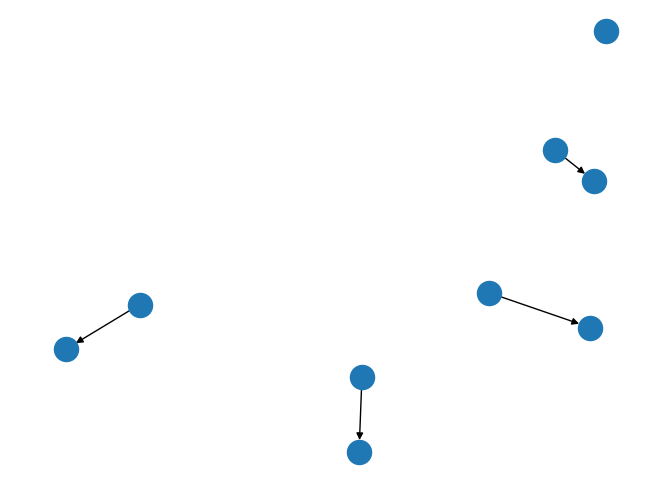

In [ ]:
# Draw G
nx.draw(G)

In [ ]:
# Check properties of the Graph G
print(nx.is_weighted(G))
print(G.is_directed())
print(G.order())
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.nodes)
print(G.edges)


False
True
9
4
9
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[(1, 5), (2, 6), (3, 7), (4, 8)]


In [ ]:
# print and save grph in hml and gexf
nx.write_gexf(G, 'graph.gexf')
nx.write_graphml(G, 'Demo_graph.graphml')

In [ ]:
# look into the xml graph
!cat graph.gexf

<?xml version='1.0' encoding='utf-8'?>
<gexf xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.gexf.net/1.2draft http://www.gexf.net/1.2draft/gexf.xsd" version="1.2">
  <meta lastmodifieddate="2024-06-18">
    <creator>NetworkX 3.3</creator>
  </meta>
  <graph defaultedgetype="directed" mode="static" name="">
    <nodes>
      <node id="0" label="0" />
      <node id="1" label="1" />
      <node id="2" label="2" />
      <node id="3" label="3" />
      <node id="4" label="4" />
      <node id="5" label="5" />
      <node id="6" label="6" />
      <node id="7" label="7" />
      <node id="8" label="8" />
    </nodes>
    <edges>
      <edge source="1" target="5" id="0" />
      <edge source="2" target="6" id="1" />
      <edge source="3" target="7" id="2" />
      <edge source="4" target="8" id="3" />
    </edges>
  </graph>
</gexf>


In [ ]:
# Print xml graph
for line in nx.generate_graphml(G):
    print(line)

<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph edgedefault="directed">
    <node id="0" />
    <node id="1" />
    <node id="2" />
    <node id="3" />
    <node id="4" />
    <node id="5" />
    <node id="6" />
    <node id="7" />
    <node id="8" />
    <edge source="1" target="5" />
    <edge source="2" target="6" />
    <edge source="3" target="7" />
    <edge source="4" target="8" />
  </graph>
</graphml>


In [ ]:
!cat graph.graphml

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="directed"><node id="0"/>
<node id="1"/>
<node id="2"/>
<node id="3"/>
<node id="4"/>
<node id="5"/>
<node id="6"/>
<node id="7"/>
<node id="8"/>
<edge source="1" target="5"/>
<edge source="2" target="6"/>
<edge source="3" target="7"/>
<edge source="4" target="8"/>
</graph></graphml>